In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def error(x1, x2):
    return np.sum((x1-x2)**2)

In [3]:
class PCA():
    def __init__(self, X, d=1):
        self.X = X
        self.n = X.shape[0]
        self.d = d
        
    def Buggy_PCA(self, X):
        U, S, Vh = np.linalg.svd(X, full_matrices=False)
#         low_dim_rpt = U[:, :self.d] @ np.diag(S[:self.d]) @ Vh[:self.d, :]   
        low_dim_rpt = X @ Vh[:self.d, :].T
        reconst = low_dim_rpt @ Vh[:self.d, :]
        
        return low_dim_rpt, reconst
    
    def Demeaned_PCA(self):
        mean = np.mean(self.X, axis=0)
        X_demean = self.X - mean
        low_dim_rpt, reconst_demean = self.Buggy_PCA(X_demean)    
        reconst = reconst_demean + mean
        
        return low_dim_rpt, reconst
    
    def Normalized_PCA(self):
        mean = np.mean(self.X, axis=0)  # Calculate the mean of each column
        std = np.std(self.X, axis=0)    # Calculate the standard deviation of each column
        X_standardized = (self.X - mean) / std
        low_dim_rpt, reconst_normal = self.Buggy_PCA(X_standardized)
        reconst = reconst_normal * std + mean
        
        return low_dim_rpt, reconst

In [ ]:
##### abandoned version (same as Buggy PCA) ##############

# def DRO(X, d=1):
#     n = X.shape[0]
#     U, S, Vh = np.linalg.svd(X, full_matrices=False)
#     X_d = U[:, :d] @ np.diag(S[:d]) @ Vh[:d, :]
    
#     b = np.mean(X_d, axis=0)
#     X_d_new = (X_d - b)/np.sqrt(n)
#     U_new, S_new, Vh_new = np.linalg.svd(X_d_new, full_matrices=False)
    
#     Z = np.sqrt(n) * U_new
#     A = Vh_new.T @ np.diag(S_new[:]) 
    
#     ones = np.array([np.ones(n)]).T
#     reconst = Z @ A.T + ones @ np.array([b])
    
#     return Z, reconst, A, b

In [4]:
########### abandoned version (computational redundance) ##############
# def DRO(X, d=1):
#     n = X.shape[0]
#     b = np.mean(X, axis=0)
#     X_demean = X - b
#     U, S, Vh = np.linalg.svd(X_demean, full_matrices=False)
#     Vh_d =  Vh[:d, :]
    
#     Lambda = Vh_d @ X_demean.T @ X_demean @ Vh_d.T
#     Lambda_temp = np.linalg.inv(np.sqrt(Lambda))
    
#     Z = np.sqrt(n) * X_demean @ Vh_d.T @ Lambda_temp
#     A = X_demean.T @ X_demean @ Vh_d.T @ Lambda_temp / np.sqrt(n)
    
#     ones = np.array([np.ones(n)]).T
#     reconst = Z @ A.T + ones @ np.array([b])
    
#     return Z, reconst, A, b

In [4]:
def DRO(X, d=1):
    n = X.shape[0]
    b = np.mean(X, axis=0)
    X_demean = X - b
    U, S, Vh = np.linalg.svd(X_demean, full_matrices=False)
    U_d = U[:, :d]
    S_d = np.diag(S[:d])
    Vh_d =  Vh[:d, :]
    
    Z = np.sqrt(n) * U_d
    A = Vh_d.T @ S_d / np.sqrt(n)
    
    ones = np.array([np.ones(n)]).T
    reconst = Z @ A.T + ones @ np.array([b])
    
    return Z, reconst, A, b

In [5]:
###### data2D.csv
D2 = pd.read_csv("data2D.csv", sep=",", header = None)
D2 = D2.to_numpy()

In [6]:
pca = PCA(X=D2, d=1)

_, X_hat_Buggy = pca.Buggy_PCA(D2)
_, X_hat_Demean = pca.Demeaned_PCA()
_, X_hat_Normalize = pca.Normalized_PCA()

_, X_hat_DRO, _, _ = DRO(D2)

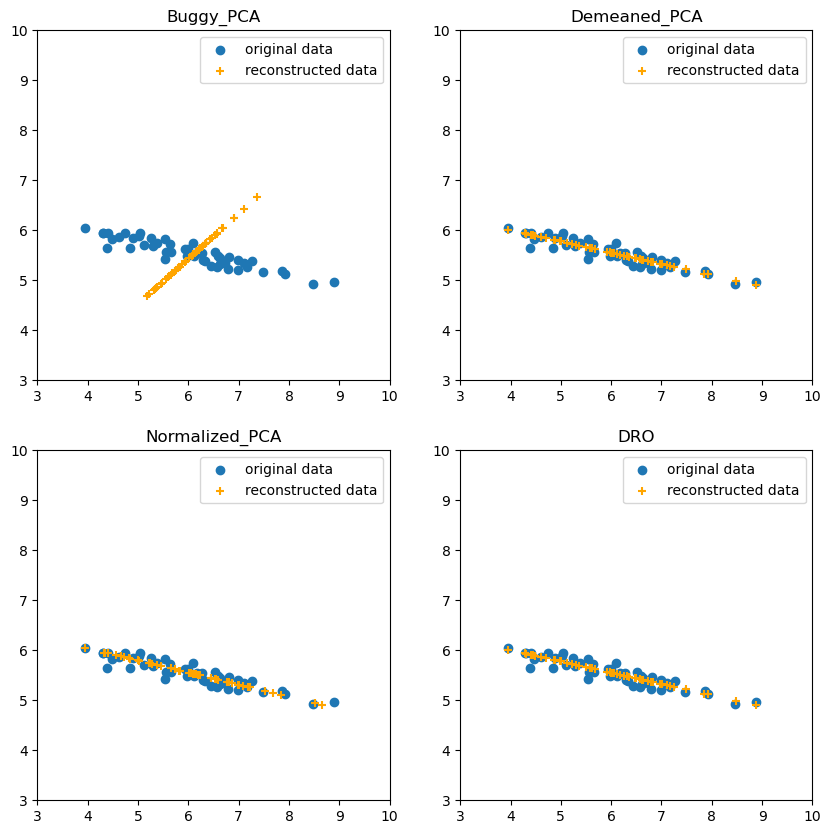

In [23]:
#fig = plt.figure(figsize=(5, 5))
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax0 = axis[0, 0]
ax0.scatter(D2[:,0], D2[:,1],label = "original data")
ax0.scatter(X_hat_Buggy[:,0], X_hat_Buggy[:,1], marker = '+', color = 'orange',label="reconstructed data")
ax0.set_xlim((3, 10))
ax0.set_ylim((3, 10))
ax0.legend(loc='best')
ax0.set_title('Buggy_PCA')

ax1 = axis[0, 1]
ax1.scatter(D2[:,0], D2[:,1],label = "original data")
ax1.scatter(X_hat_Demean[:,0], X_hat_Demean[:,1], marker = '+', color = 'orange',label="reconstructed data")
ax1.set_xlim((3, 10))
ax1.set_ylim((3, 10))
ax1.legend(loc='best')
ax1.set_title('Demeaned_PCA')

ax2 = axis[1, 0]
ax2.scatter(D2[:,0], D2[:,1],label = "original data")
ax2.scatter(X_hat_Normalize[:,0], X_hat_Normalize[:,1], marker = '+', color = 'orange',label="reconstructed data")
ax2.set_xlim((3, 10))
ax2.set_ylim((3, 10))
ax2.legend(loc='best')
ax2.set_title('Normalized_PCA')

ax3 = axis[1, 1]
ax3.scatter(D2[:,0], D2[:,1],label = "original data")
ax3.scatter(X_hat_DRO[:,0], X_hat_DRO[:,1], marker = '+', color = 'orange',label="reconstructed data")
ax3.set_xlim((3, 10))
ax3.set_ylim((3, 10))
ax3.legend(loc='best')
ax3.set_title('DRO')

plt.show()


In [8]:
n = D2.shape[0]
Buggy_error = error(D2, X_hat_Buggy)/n
Demean_error = error(D2, X_hat_Demean)/n
Normalize_error = error(D2, X_hat_Normalize)/n
DRO_error = error(D2, X_hat_DRO)/n

print("Buggy PCA error = ", Buggy_error)
print("Demeaned PCA error = ", Demean_error)
print("Normalized PCA error = ", Normalize_error)
print("DRO error = ", DRO_error)

Buggy PCA error =  0.8869030837347942
Demeaned PCA error =  0.010006085628512906
Normalized PCA error =  0.04947208345477067
DRO error =  0.010006085628512911


In [11]:
###### data2D.csv
D1000 = pd.read_csv("data1000D.csv", sep=",", header = None)
#D1000
D1000 = D1000.to_numpy()

In [13]:
D1000

array([[ 1.33168104e+01,  2.90287802e+00,  1.38870348e+01, ...,
         2.22139385e+01,  2.64470131e+01,  1.37326379e+01],
       [ 1.30543587e+01,  1.03359739e+01,  1.38135916e+01, ...,
         2.18243147e+01,  2.48470775e+01,  1.05123768e+01],
       [ 8.10029873e+00,  1.48301692e+01,  1.11557492e+01, ...,
         2.09040550e+01,  2.51160597e+01,  7.13864040e+00],
       ...,
       [ 1.27980811e+01,  3.87267740e+00,  1.49498396e+01, ...,
         2.01927154e+01,  2.08078592e+01,  1.31894303e+01],
       [ 9.65246243e+00, -5.40115960e+00,  9.67989551e+00, ...,
         1.86843981e+01,  3.38934238e+01,  9.60106349e+00],
       [-6.69259823e-04, -7.92208010e+00,  2.80317271e+01, ...,
         1.06673121e+01,  1.49384409e+01,  1.51857918e+01]])

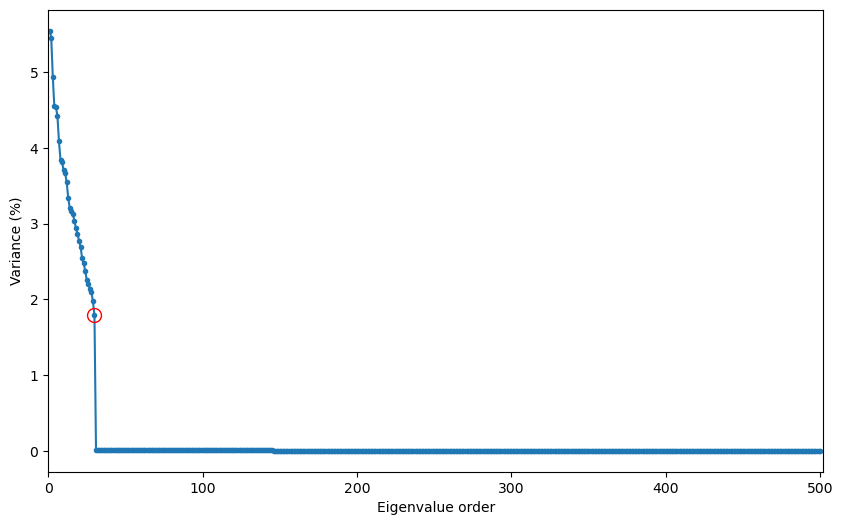

In [42]:
D = D1000.shape[0]
mean = np.mean(D1000, axis=0)
_, S, _ = np.linalg.svd(D1000-mean , full_matrices=False)

proportion = ([S[i]**2 for i in range(D)])/np.sum(S**2)

plt.figure(figsize=(10, 6))
plt.plot(range(1,D+1), proportion*100, linestyle='-',marker = 'o',markersize = 3)
plt.plot(30, proportion[29]*100, marker = 'o', mfc='none', color='red', markersize = 10)
plt.xlim(xmin=0, xmax=502)
plt.xlabel('Eigenvalue order')
plt.ylabel('Variance (%)')
plt.show()

In [39]:
proportion*100

array([5.54531000e+00, 5.45279351e+00, 4.94070843e+00, 4.54551125e+00,
       4.54348551e+00, 4.42017538e+00, 4.08360639e+00, 3.84032651e+00,
       3.81267004e+00, 3.70114765e+00, 3.66493935e+00, 3.54666635e+00,
       3.33854406e+00, 3.20246215e+00, 3.16987381e+00, 3.12717540e+00,
       3.03218005e+00, 2.94024739e+00, 2.86450805e+00, 2.77302690e+00,
       2.69594544e+00, 2.54044151e+00, 2.47468754e+00, 2.37525431e+00,
       2.25497438e+00, 2.20088440e+00, 2.13602355e+00, 2.09560407e+00,
       1.97387984e+00, 1.78656068e+00, 5.56303264e-03, 5.48052179e-03,
       5.35966668e-03, 5.30661072e-03, 5.28510609e-03, 5.20361382e-03,
       5.17343604e-03, 5.10899570e-03, 5.09599966e-03, 5.07618547e-03,
       5.02087627e-03, 5.00579314e-03, 4.96391363e-03, 4.94534127e-03,
       4.88344601e-03, 4.86717316e-03, 4.82030535e-03, 4.80919741e-03,
       4.74834743e-03, 4.72992408e-03, 4.71895570e-03, 4.69769261e-03,
       4.67511804e-03, 4.64491211e-03, 4.59110087e-03, 4.57959988e-03,
      

In [16]:
pca = PCA(X=D1000, d=30)

n = D1000.shape[0]
_, X_hat_Buggy = pca.Buggy_PCA(D1000)
_, X_hat_Demean = pca.Demeaned_PCA()
_, X_hat_Normalize = pca.Normalized_PCA()

_, X_hat_DRO, _, _ = DRO(D1000, d=30)

In [18]:
Buggy_error = error(D1000, X_hat_Buggy)/n
Demean_error = error(D1000, X_hat_Demean)/n
Normalize_error = error(D1000, X_hat_Normalize)/n
DRO_error = error(D1000, X_hat_DRO)/n

print("Buggy PCA error = ", Buggy_error)
print("Demeaned PCA error = ", Demean_error)
print("Normalized PCA error = ", Normalize_error)
print("DRO error = ", DRO_error)

Buggy PCA error =  802.7313986203587
Demeaned PCA error =  273.04595897860275
Normalized PCA error =  273.6285809976233
DRO error =  273.0459589786028
